# **Problem Statement**

## Business Context

 Credit scoring is an important part of the financial industry, particularly as a measure of assessing the risk associated with issuing credit cards. By analyzing the data submitted by applicants, banks can estimate the chances of future defaults on credit card payments. Based on their analysis of the financial and personal attributes of the applicants, banks make informed decisions on whether to issue a credit card to an applicant. This allows for effective risk management.

Traditionally, banks undertook the task of determining creditworthiness manually via a structured process. This would include reviewing the applicant's credit report to assess their credit history, evaluating employment status and income statistics to assess their ability to repay, and also considering other factors such as length of credit history and types and number of credit accounts. This manual process would be time-consuming, even considering the initial screening part only.

## Objective

A renowned bank has been facing a challenge: the percentage of credit card customers who defaulted payments has increased from 5% to 9%. This required them to thoroughly review the existing application screening process. Based on the results of the same, they believe that one of the reasons for the increase in defaulters is a lapse in process adherence. This might have been due to a rise in the volume of credit card applications, which is up by 35% in the past three months.

To accurately assess the risk involved and approve credit to financially reliable applicants, the bank wants to introduce a machine learning-based solution. As a part of the Data Science team of the bank, you have been tasked with analyzing the data of past applicants, identifying patterns in it, building an ML model to accurately determine the applicants' credibility, and identifying the attributes that drive eligibility for availing credit cards. The end goal is to use this ML-based solution to streamline the initial screening process to efficiently and accurately assess the creditworthiness of applications.

## Data Dictionary


1. Gender: The gender of the applicant
2. Age: The age of the applicant
3. PriorDefault: An indicator of the prior default history of the applicant

    *  0 represents no prior defaults
    *  1 represents at least one prior default
4. CreditScore: The current credit score of the applicant
5. Annual Income: The annual income of the applicant (in thousand dollars) based on their last drawn salary
6. Employed: An indicator of whether the applicant is currently employed
    * 1 represents currently employed
    * 0 represents currently not employed
7. Approval: Whether the credit card application was approved (Yes/No)

# **Check for Installed Python packages and Install as necessary

In [61]:
!pip freeze

absl-py==1.4.0
absolufy-imports==0.3.1
accelerate==1.11.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.1
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.17.0
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.11.0
anywidget==0.9.18
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.1
arrow==1.4.0
arviz==0.22.0
astropy==7.1.1
astropy-iers-data==0.2025.10.20.0.39.8
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.0.1
Authlib==1.6.5
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.2
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.26.0
bigquery-magics==0.10.3
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.1.0
blosc2==3.10.2
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
Brotli==1.1.0
build==1.3.0
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.10.5
cffi==2.0.0
chardet==5.2.0
charset-normalizer==3.4.4
chex==0.1.90
cla

# Import Python libraries

In [2]:
# To load and maniupulate data
import pandas as pd
import numpy as np

# To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# To split the data into training and test sets.
from sklearn.model_selection import train_test_split

# To training Decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To compute the model perforamnce
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score
)

In [3]:
# Connect and Mount Google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the Data

In [4]:
credit_data = pd.read_csv('/content/drive/My Drive/PGP-AIML/M2 : Machine Learning/Week2/credit_card_approval.csv')
data = credit_data.copy()

# Data Overview

Check first and last five rows of the data

In [5]:
data.head(5)

,Age,Credit Score,Annual Income,PriorDefault,Employed,Approval,Gender
0,33.541537,678.0,53.984881,0,1,No,Male
1,24.808335,624.0,41.131160,1,0,No,Male
2,23.342078,671.0,33.012298,1,1,No,Female
3,29.987970,671.0,66.942232,1,1,No,Female
4,29.707443,630.0,116.613468,1,1,No,Male


In [6]:
data.tail(5)

,Age,Credit Score,Annual Income,PriorDefault,Employed,Approval,Gender
2495,41.401327,768.0,65.869626,0,0,No,Male
2496,31.341132,733.0,56.156239,0,1,Yes,Male
2497,43.622086,724.0,105.815964,0,0,No,Male
2498,44.091122,741.0,121.522753,0,1,Yes,Female
2499,23.775377,446.0,54.638692,1,1,No,Female


Check the column names and data types

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            2500 non-null   float64
 1   Credit Score   2500 non-null   float64
 2   Annual Income  2500 non-null   float64
 3   PriorDefault   2500 non-null   int64  
 4   Employed       2500 non-null   int64  
 5   Approval       2500 non-null   object 
 6   Gender         2500 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 136.8+ KB


* There are 5 numeric and 2 categorical attributes in the data

Describe data summary

In [8]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,2500.0,NaN,NaN,NaN,37.014342,9.814617,16.4,29.788468,35.487664,42.573775,78.2
Credit Score,2500.0,NaN,NaN,NaN,703.0196,60.102094,342.0,666.0,713.0,747.0,837.0
Annual Income,2500.0,NaN,NaN,NaN,76.421887,32.942672,4.87,51.732313,71.69551,97.244651,204.4
PriorDefault,2500.0,NaN,NaN,NaN,0.3,0.458349,0.0,0.0,0.0,1.0,1.0
Employed,2500.0,NaN,NaN,NaN,0.702,0.457471,0.0,0.0,1.0,1.0,1.0
Approval,2500,2,Yes,1401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,2500,3,Female,1251,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* The average credit score of the applicants is 703
* ~56% of the applications are approved.
* Average age of applicant is 37, while the youngest applicant is 16 and the oldest is 78years
* Average annual income of the applicants is 76K.


Check for duplicates in the data

In [9]:
data.duplicated().sum()

np.int64(0)

* There are no duplicates in the data

Check for null values

In [10]:
data.isna().sum()

,0
Age,0
Credit Score,0
Annual Income,0
PriorDefault,0
Employed,0
Approval,0
Gender,0


* No null values exists in the data

# **Exploratory Data Analysis**:

## Univariate Analysis

In [11]:
numeric_features = data.select_dtypes(include=np.number).columns.to_list()
numeric_features

['Age', 'Credit Score', 'Annual Income', 'PriorDefault', 'Employed']

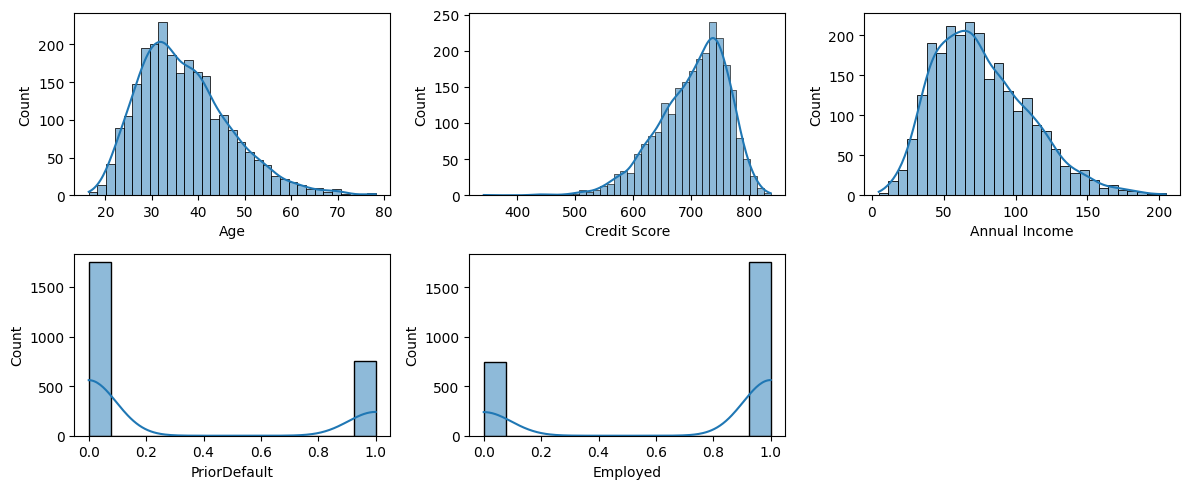

In [12]:
# Check the distribution of data by plotting histograms

plt.figure(figsize=(12,5))

for i, feature in enumerate(numeric_features):
  plt.subplot(2,3,i+1)
  sns.histplot(data=data, x=feature, kde=True)

plt.tight_layout() # To add spacing between the plots.
plt.show()

** Observations **
1. Age and Annual income data right skewed.
2. Credit score data is left skewed.
3. Prior Default and Employed have only 2 unique values

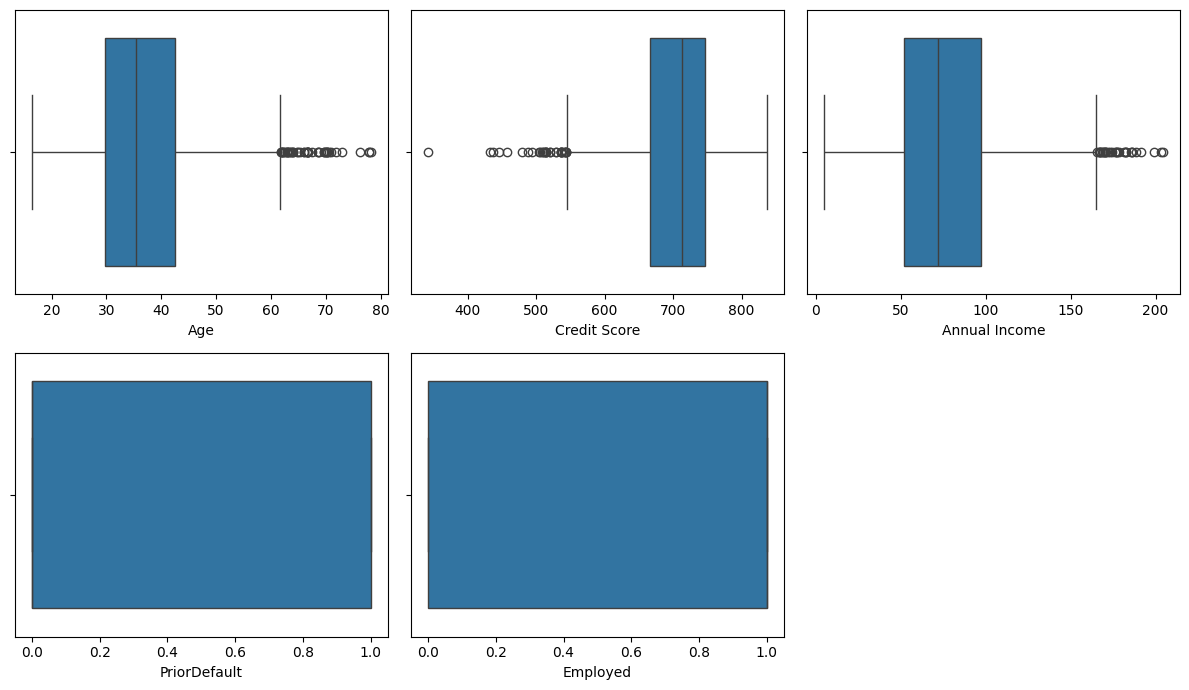

In [13]:
# Check for outliers in the data.

plt.figure(figsize=(12,7))
for i, feature  in enumerate(numeric_features):
  plt.subplot(2,3, i+1)
  sns.boxplot(data=data, x=feature)

plt.tight_layout()
plt.show()


**Observations**
* Age, Credit score and Annual Income have some outliers.

In [14]:
# Get categorical features

categorical_features = data.select_dtypes(exclude=np.number).columns.to_list()

for feature in categorical_features:
  print(data[feature].value_counts(normalize=True)*100)
  print("_"*50)



Approval
Yes    56.04
No     43.96
Name: proportion, dtype: float64
__________________________________________________
Gender
Female    50.04
Male      47.84
Others     2.12
Name: proportion, dtype: float64
__________________________________________________


Check the count plot for categorical features


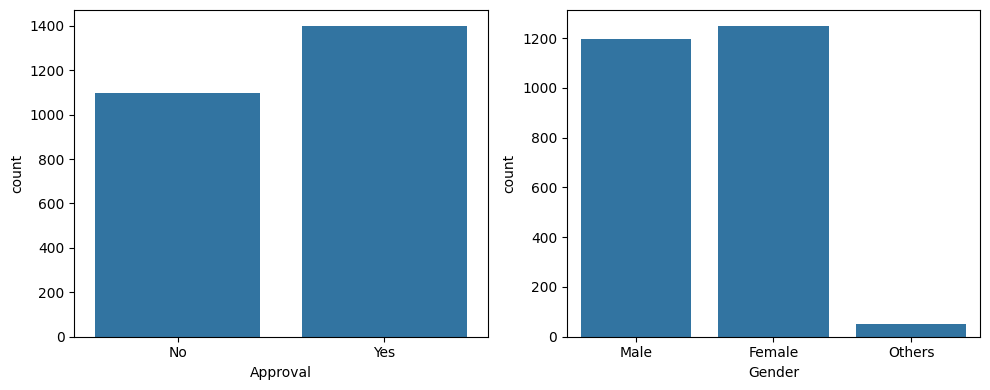

In [15]:
plt.figure(figsize=(10,4))

for i, feature in enumerate(categorical_features):
  plt.subplot(1,2,i+1)
  sns.countplot(data=data, x=feature)

plt.tight_layout()
plt.show()

**Observations**
* More applications approved than denied.
* No. of Male and Female applicants are similar, there are small number of applicants with no Gender information.

Employed
1    70.2
0    29.8
Name: proportion, dtype: float64


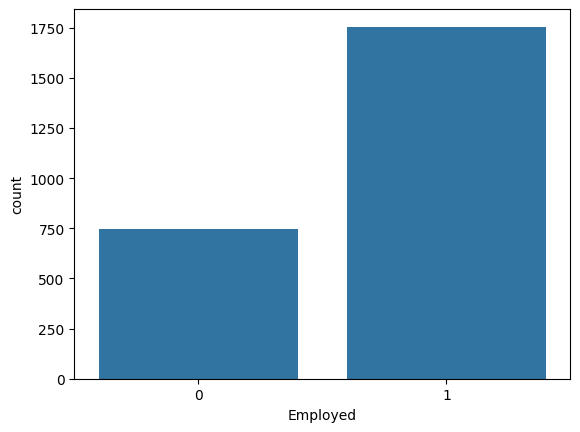

In [16]:
# Check the count plot for Employed

print(100*data['Employed'].value_counts(normalize=True))
sns.countplot(data=data, x='Employed')
plt.show()

* 70% of the applicants are employed.

PriorDefault
0    70.0
1    30.0
Name: proportion, dtype: float64


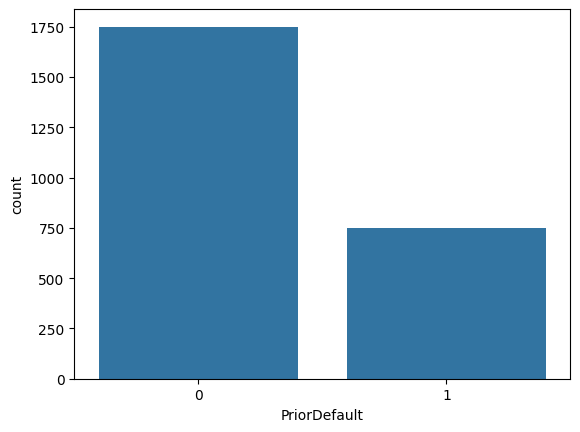

In [17]:
# Count plot for prior defaulted.
print(100*data['PriorDefault'].value_counts(normalize=True))

sns.countplot(data=data, x='PriorDefault')
plt.show()

* 30% of applicants defaulted on their credit in the past.

## Bivariate Analysis

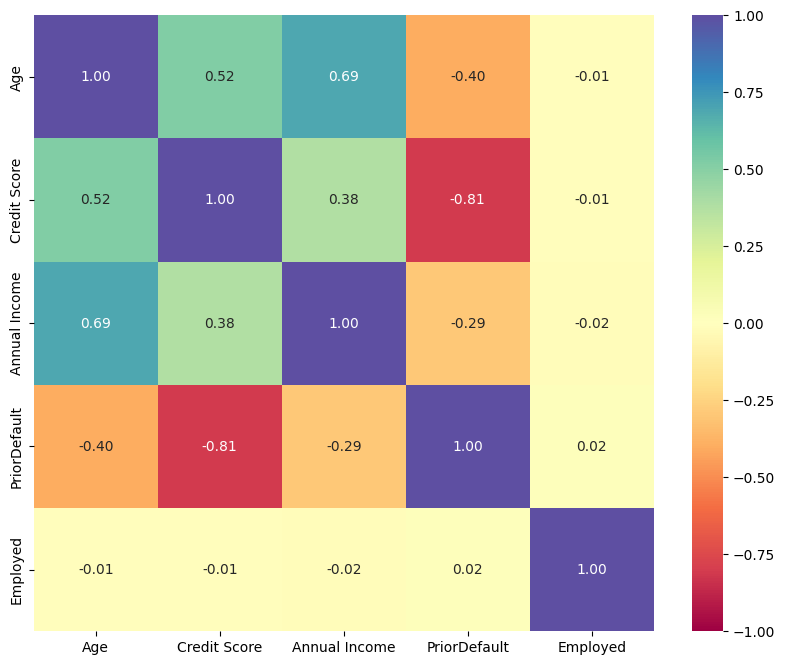

In [18]:
# Correlation between the numeric features.

plt.figure(figsize=(10,8))
sns.heatmap(data=data[numeric_features].corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral', fmt='0.2f')
plt.show()

**Observations**
* Age shows a positive correlation with Annual Income and Credit score and a negative correlation with Prior Default.
* Credit score shows a strong negative correlation with PriorDefault.


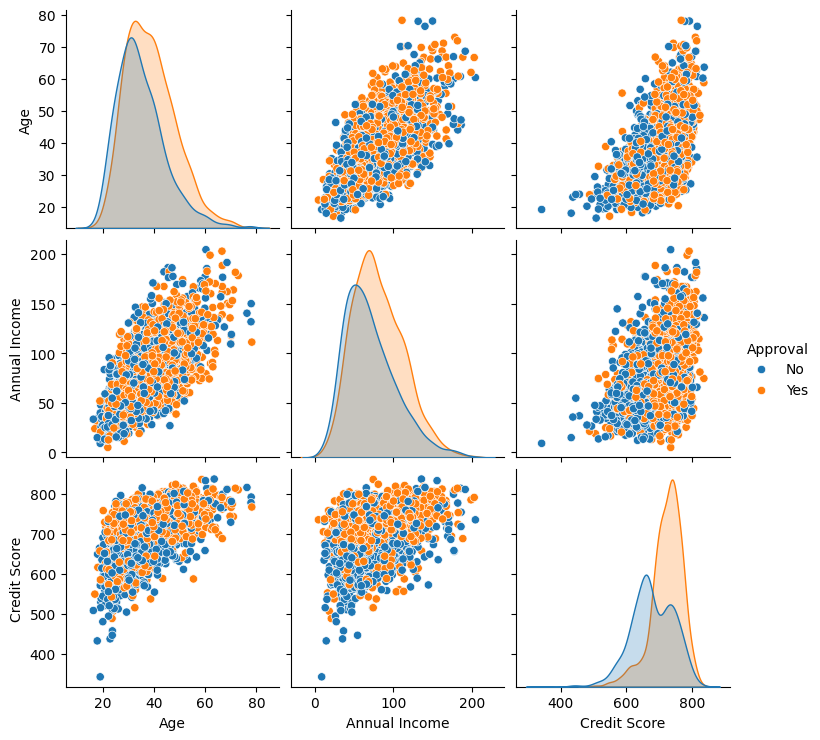

In [19]:
# Pairplot between the numeric features

#plt.figure(figsize=(8,8))
sns.pairplot(data=data, vars=['Age', 'Annual Income', 'Credit Score'], hue='Approval')
plt.show()

*  Annual income and credit scores show an increase with increase in Age.

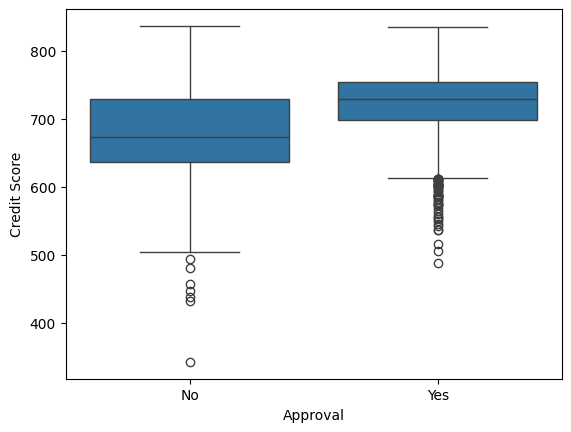

In [20]:
# Credit score vs Approvals

sns.boxplot(data=data, x='Approval', y='Credit Score')
plt.show()

* Credit scores above 690 seem to have more approvals.

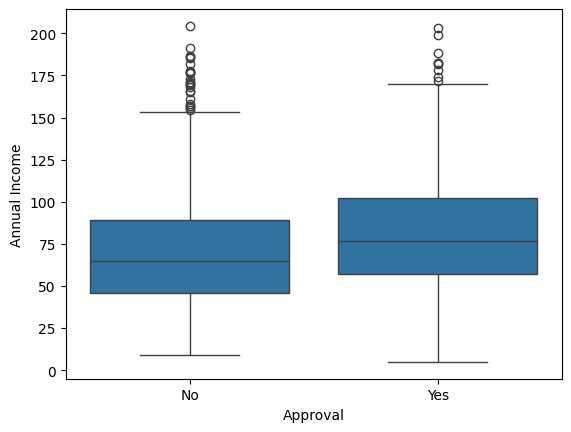

In [21]:
# Income vs Approval

sns.boxplot(data=data, x='Approval', y='Annual Income')
plt.show()

* Income of above 60K seems to have more approvals.
* There are some rejections for High income applicants too.

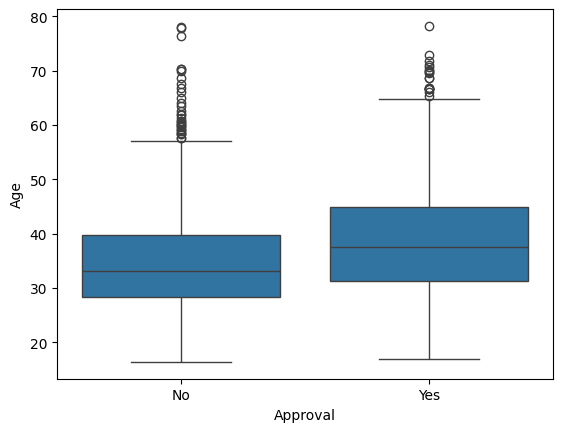

In [22]:
# Age vs Approvals

sns.boxplot(data=data, x='Approval', y='Age')
plt.show()

* There are more rejections aont younger applicants.

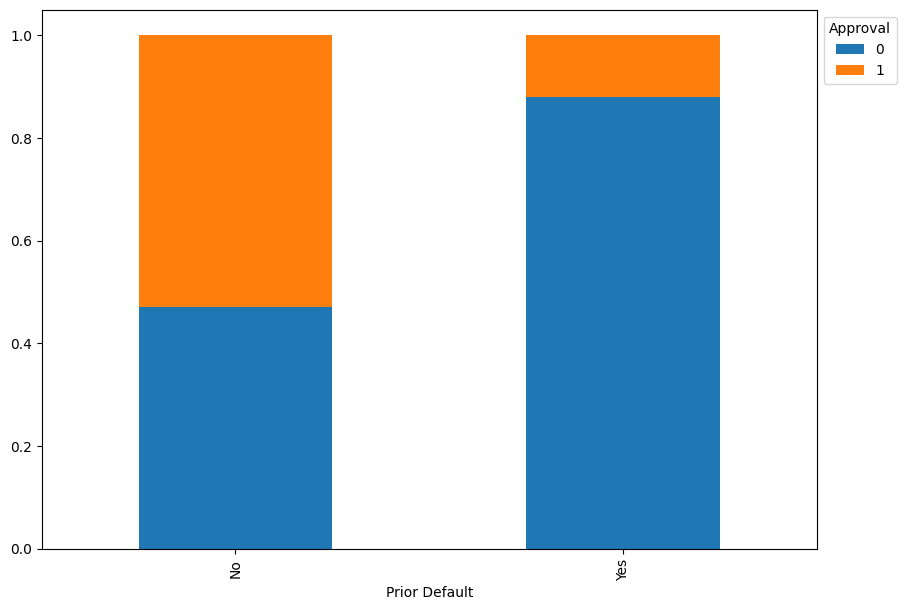

In [23]:
# Cross tab to visualize the Approvals to Prior Default

tab = pd.crosstab(data['Approval'], data['PriorDefault'], normalize='index')
tab.plot(kind='bar', stacked=True, figsize=(10,7))
plt.xlabel('Prior Default')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Approval')
plt.show()

* Significant no. of prior defaulted applications are rejected.

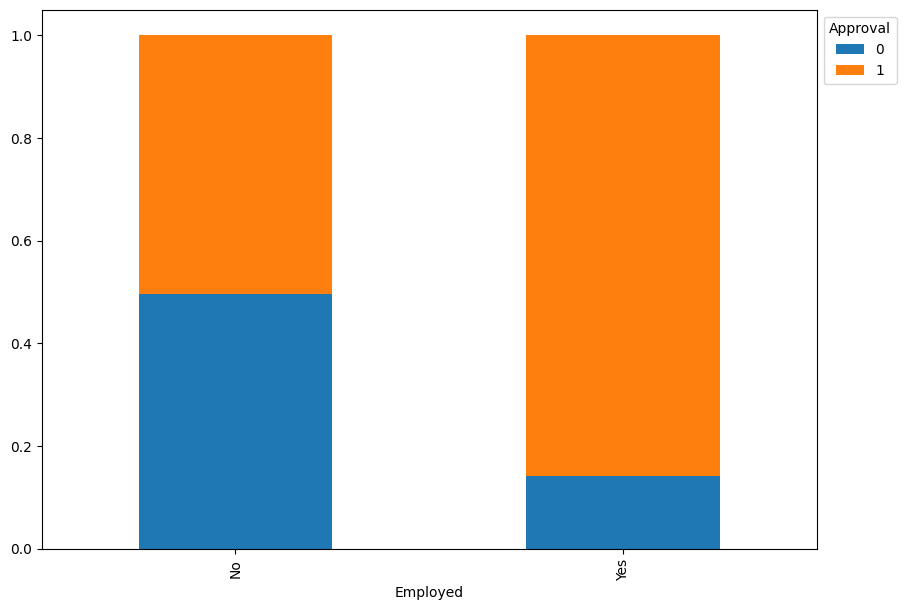

In [24]:
# Approvals vs Employed cross tab.

tab = pd.crosstab(data['Approval'], data['Employed'], normalize='index')
tab.plot(kind='bar', stacked=True, figsize=(10,7))

plt.xlabel('Employed')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Approval')
plt.show()

* Employed applicants have more approvals compared to Unemployed.

# **Data Preperation for Modeling**

In [25]:
X = data.drop('Approval', axis=1)
y = data['Approval']

In [26]:
# Creating dummy variables for categorical features.
X = pd.get_dummies(data=X, columns=X.select_dtypes(include=['object']).columns.tolist(), drop_first=True)

# Change the categorical variables data type to int
X['Gender_Male'] = X['Gender_Male'].astype(int)
X['Gender_Others'] = X['Gender_Others'].astype(int)


X.head()

,Age,Credit Score,Annual Income,PriorDefault,Employed,Gender_Male,Gender_Others
0,33.541537,678.0,53.984881,0,1,1,0
1,24.808335,624.0,41.131160,1,0,1,0
2,23.342078,671.0,33.012298,1,1,0,0
3,29.987970,671.0,66.942232,1,1,0,0
4,29.707443,630.0,116.613468,1,1,1,0


In [27]:
# Label encoding of the Approval attribute
y = y.map({'Yes': 1, 'No': 0})
y.head()

,Approval
0,0
1,0
2,0
3,0
4,0


In [28]:
# Split the data into training and test data sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [29]:
print("Shape of the X_train", X_train.shape)
print("Shape of the X_test", X_test.shape)

print("\n Percentage of classes in y_train \n", 100*y_train.value_counts(normalize=True))
print("\n Percentage of classes in y_test \n", 100*y_test.value_counts(normalize=True))

Shape of the X_train (2000, 7)
Shape of the X_test (500, 7)

 Percentage of classes in y_train 
 Approval
1    56.05
0    43.95
Name: proportion, dtype: float64

 Percentage of classes in y_test 
 Approval
1    56.0
0    44.0
Name: proportion, dtype: float64


# Model the data

In [30]:
dtree1 = DecisionTreeClassifier(random_state=42)

dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Model Evaluation

In [31]:
def model_performance_classification(model, predictors, target):
  """
  Function to compute the performance of Classification model

  model: Classification model
  predictors: Input features
  target: Output class
  """

  pred = model.predict(predictors)

  accuracy = accuracy_score(target, pred)
  recall = recall_score(target, pred)
  precision = precision_score(target,pred)
  f1 = f1_score(target, pred)

  # Create a dataframe with performance metrics
  df_perf = pd.DataFrame({
      "Accuracy" : accuracy,
      "Recall": recall,
      "Precision": precision,
      "F1 Score": f1

  },index=[0])

  return df_perf


In [32]:
def plot_confusion_matrix(model, predictors, target):
  """
    function to compute the confusion matrix for a classification model.
    model: Classification model
    predictors: Input features
    target: Output classes
  """

  y_pred = model.predict(predictors)

  # Calcualte the confusion matrix
  cm = confusion_matrix(target, y_pred)

  # Create labels for each cell in the confusion matrix with both count and percentage
  labels = np.asarray([
      ["{0:0.0f}".format(item) + "\n {0:0.2%}".format(item/cm.flatten().sum())]
      for item in cm.flatten()
  ]).reshape(2,2)

  plt.figure(figsize=(6,4))

  # Plot the confusion matrix.
  sns.heatmap(cm, annot=labels, fmt="")
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plt.show()



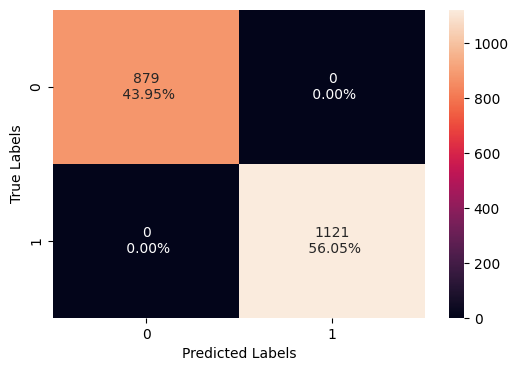

In [33]:
# Plot the confusion matrix on training data
plot_confusion_matrix(dtree1, X_train, y_train)

In [34]:
# Model performance on trainingn data
dtree1_train_perf = model_performance_classification(dtree1, X_train, y_train)
dtree1_train_perf

,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


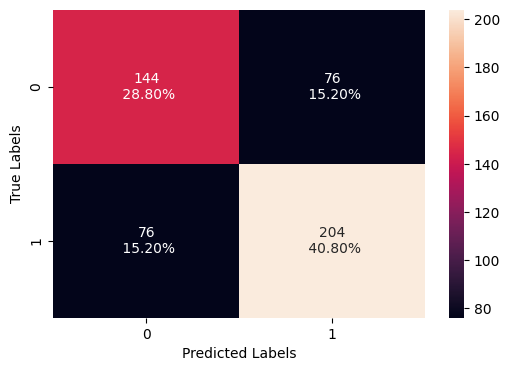

In [35]:
# Plot the confusion matrix on test data
plot_confusion_matrix(dtree1, X_test, y_test)

In [36]:
dtree1_test_perf = model_performance_classification(dtree1, X_test, y_test)
dtree1_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.696,0.728571,0.728571,0.728571


* There is a huge difference in the model accuracy between the training and test data.
* This indicates that the model is overfitting of the data

# Visualize the tree

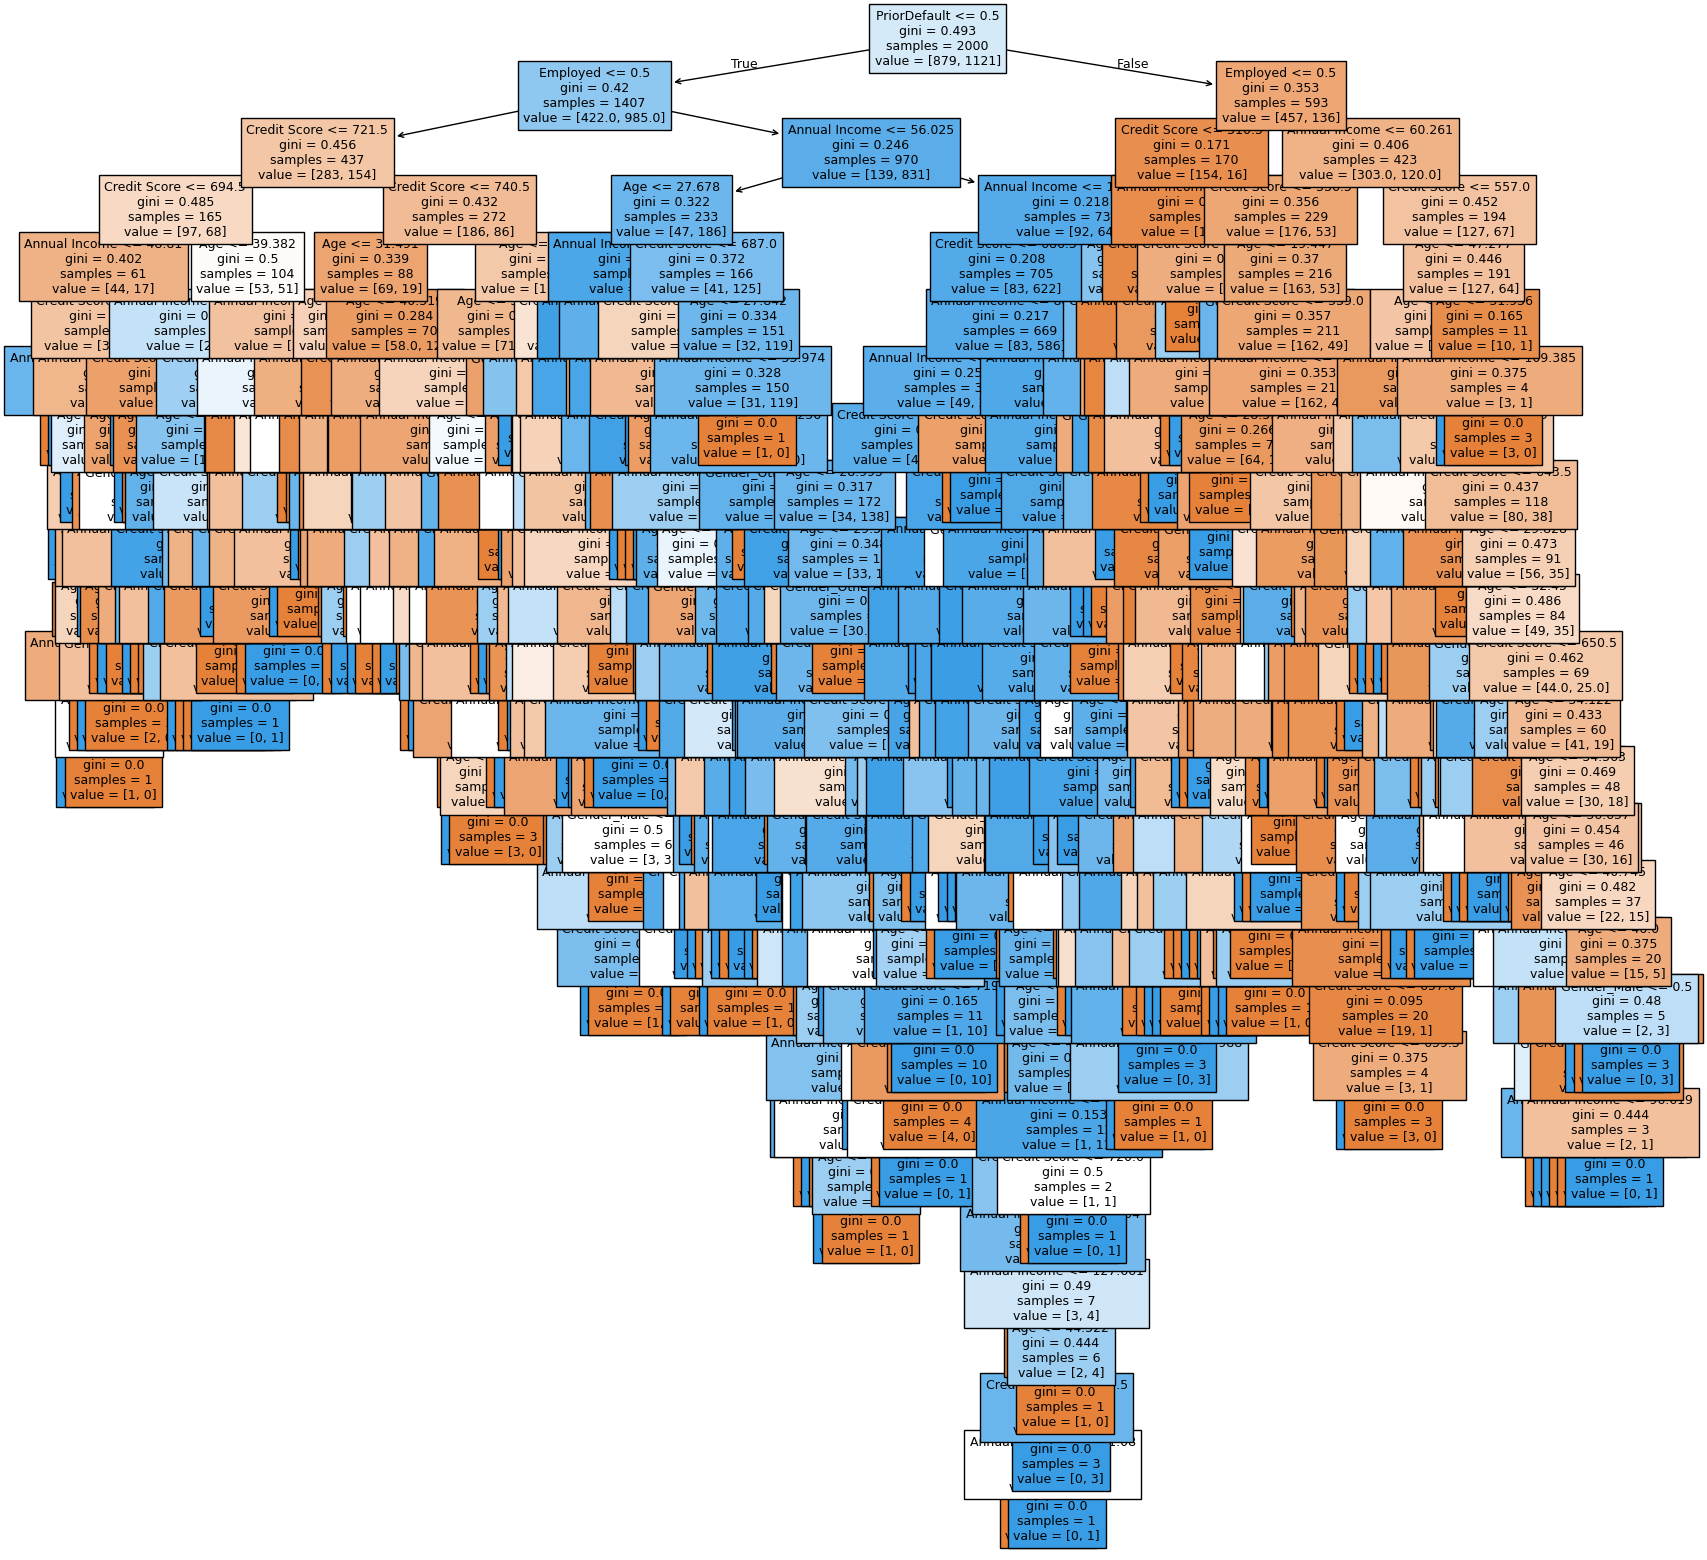

In [37]:
feature_names = X_train.columns.tolist()

plt.figure(figsize=(20,20))

out = tree.plot_tree(
    decision_tree=dtree1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None
    )

for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(1)


plt.show()



In [38]:
# Export the tree

print(tree.export_text(dtree1, feature_names=feature_names, show_weights=True))


|--- PriorDefault <= 0.50
|   |--- Employed <= 0.50
|   |   |--- Credit Score <= 721.50
|   |   |   |--- Credit Score <= 694.50
|   |   |   |   |--- Annual Income <= 48.81
|   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |--- Annual Income >  48.81
|   |   |   |   |   |--- Credit Score <= 679.50
|   |   |   |   |   |   |--- Annual Income <= 66.92
|   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |--- Annual Income >  66.92
|   |   |   |   |   |   |   |--- weights: [0.00, 4.00] class: 1
|   |   |   |   |   |--- Credit Score >  679.50
|   |   |   |   |   |   |--- Annual Income <= 70.75
|   |   |   |   |   |   |   |--- Age <= 32.40
|   |   |   |   |   |   |   |   |--- Age <= 24.70
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |--- Age >  24.70
|   |   |   |   |   |   |   |   |   |--- Age <= 27.56
|   |   |   |   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0

# Pruning the Tree - Pre prune

In [39]:
# Define the parameters for pre-pruning the tree
max_depth_values = np.arange(2,11,2)
max_leaf_node_values = np.arange(8,51,8)
min_samples_split_values = np.arange(8,51,8)

# Variables to store the best model and the score diff.
best_estimator = None
best_score_diff = float('inf')

# Loop throug the all possibilities to find the best estimator.
for max_depth in max_depth_values:
  for max_leaf_nodes in max_leaf_node_values:
    for min_samples_split in min_samples_split_values:

      # Initialize the estimator with the prune parameters
      estimator = DecisionTreeClassifier(
          max_depth=max_depth,
          max_leaf_nodes=max_leaf_nodes,
          min_samples_split=min_samples_split,
          random_state=42
          )

      # Fit the data
      estimator.fit(X_train, y_train)

      # Predict on Training data set.
      train_pred = estimator.predict(X_train)
      # Determine f1 score on traning data set.
      f1_train = f1_score(y_train, train_pred)

      # Predit on Test data set
      test_pred = estimator.predict(X_test)
      # Determine the f1` score on test data set.
      f1_test = f1_score(y_test, test_pred)

      score_diff = abs(f1_test - f1_train)

      if score_diff < best_score_diff:
        best_score_diff = score_diff
        best_estimator = estimator






## Model performance of Best estimator

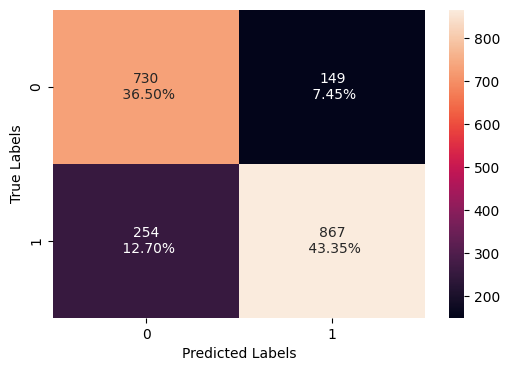

In [40]:
dtree2 = best_estimator

#Plot confusion matrix for training data using best_estimator
plot_confusion_matrix(dtree2, X_train, y_train)



In [41]:
# Print the Best estimator performance matrix
dtree2_train_perf = model_performance_classification(best_estimator, X_train, y_train)
dtree2_train_perf

,Accuracy,Recall,Precision,F1 Score
0,0.7985,0.773417,0.853346,0.811418


* Model accuracy is ~80% on training data set.

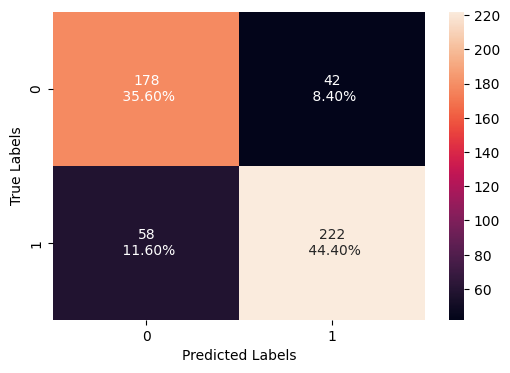

In [42]:
# Plot confusion matrix for test data using best estimator
plot_confusion_matrix(dtree2, X_test, y_test)

In [43]:
# Print performance matrix for test data using best estimator
dtree2_test_perf = model_performance_classification(dtree2, X_test, y_test)
dtree2_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.8,0.792857,0.840909,0.816176


* Model accuracy is 80%, and close to that of training data set.
* This indicates that model is able to generalize the test (unseen) data well.

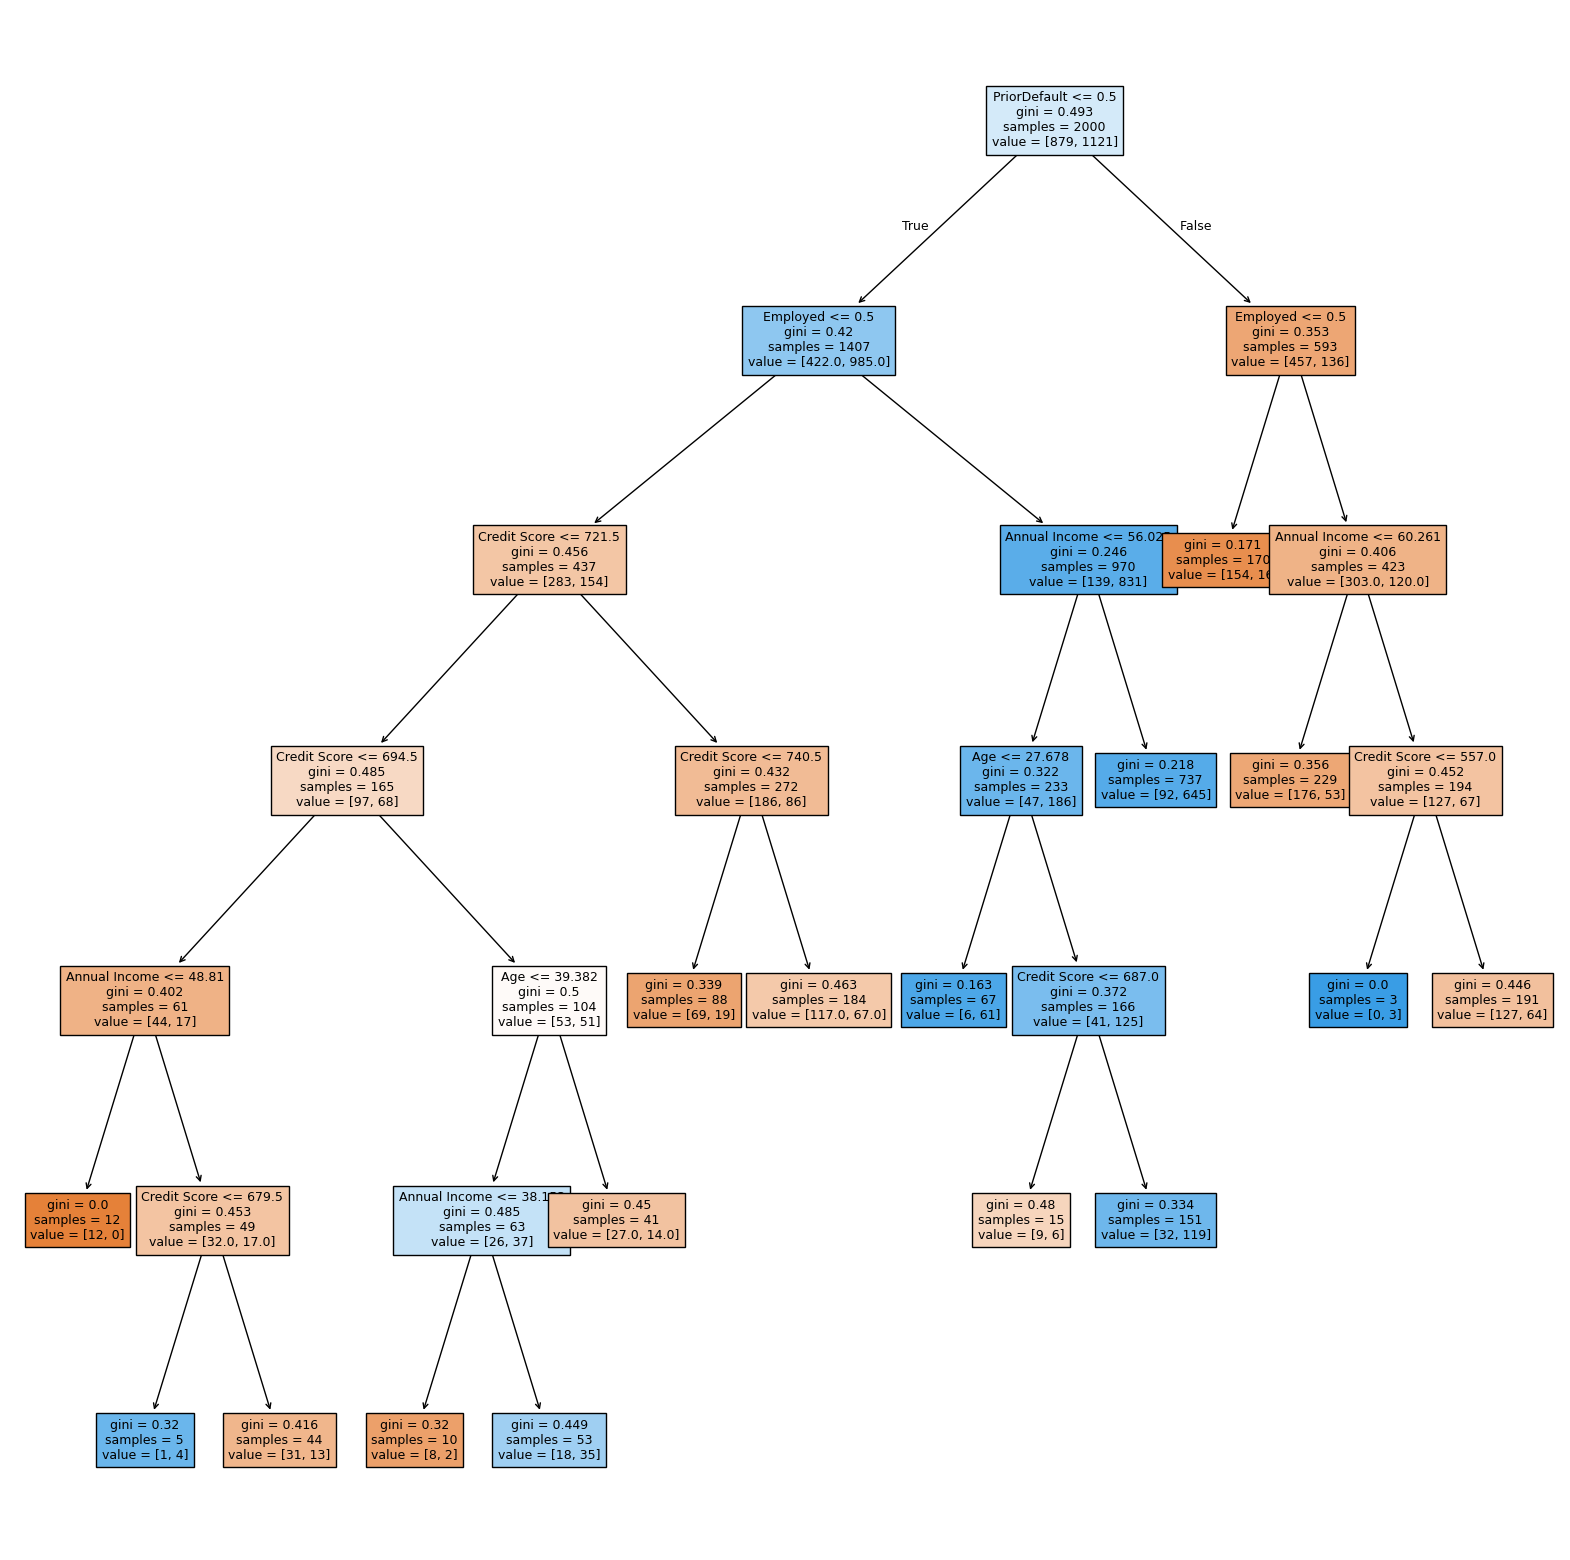

In [44]:
# Visualize the tree.
feature_names = X_train.columns.to_list()

plt.figure(figsize=(20,20))

out = tree.plot_tree(decision_tree=dtree2, feature_names=feature_names, filled=True, fontsize=9, class_names=None, node_ids=False)

for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(1)

plt.show()




In [45]:
# generate the text version of the tree.
print(tree.export_text(dtree2, feature_names=feature_names, class_names=None))

|--- PriorDefault <= 0.50
|   |--- Employed <= 0.50
|   |   |--- Credit Score <= 721.50
|   |   |   |--- Credit Score <= 694.50
|   |   |   |   |--- Annual Income <= 48.81
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Annual Income >  48.81
|   |   |   |   |   |--- Credit Score <= 679.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Credit Score >  679.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Credit Score >  694.50
|   |   |   |   |--- Age <= 39.38
|   |   |   |   |   |--- Annual Income <= 38.15
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Annual Income >  38.15
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  39.38
|   |   |   |   |   |--- class: 0
|   |   |--- Credit Score >  721.50
|   |   |   |--- Credit Score <= 740.50
|   |   |   |   |--- class: 0
|   |   |   |--- Credit Score >  740.50
|   |   |   |   |--- class: 0
|   |--- Employed >  0.50
|   |   |--- Annual Income <= 56.03
|   |   |   |--- Age <= 27

## Model pruning - Post pruning

In [46]:
# Determine the cost complexity path in a decision tree model.

# New Classification model
clf = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for model using the training data.
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Determine the array of effective alphas from the cost complexity path
ccp_alphas = abs(path.ccp_alphas)

# Extract array oftotal impurities at each alpha along the pruning path
impurities = path.impurities

pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000292,0.000875
2,0.000357,0.002304
3,0.000357,0.003732
4,0.000375,0.004482
...,...,...
177,0.001428,0.313310
178,0.001488,0.319263
179,0.004358,0.323621
180,0.076619,0.400239


Text(0.5, 1.0, 'Total Impurity vs Effective alpha of the training data.')

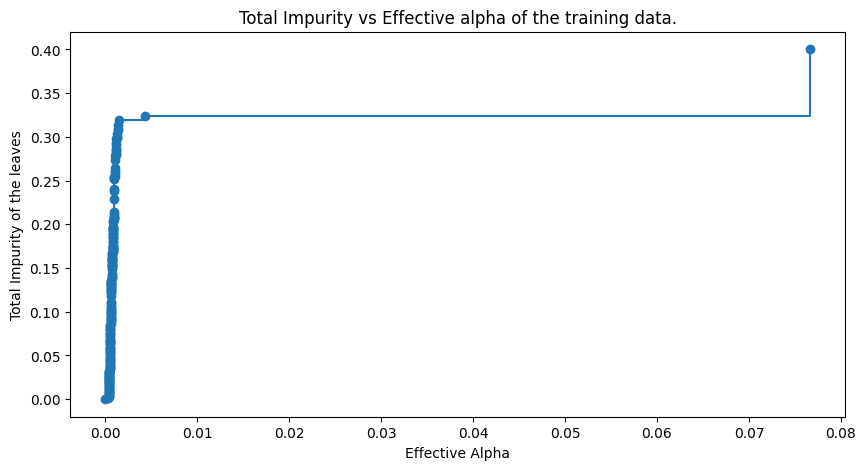

In [47]:
# Plot a diagram between alphas and impurities

fig, ax = plt.subplots(figsize=(10,5))

# Plot the impurities against the alphas excluding the last value,
# using markers at each data point and connecting them with steps.

ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# set x-axis label.
ax.set_xlabel("Effective Alpha")

# set y-axis label
ax.set_ylabel("Total Impurity of the leaves")

# set the title of the graph.
ax.set_title("Total Impurity vs Effective alpha of the training data.")






* Next train the model using the effective alphas.
* The last value of ccp_alpha prunes the whole tree resulting in a single node.

In [48]:
# Create a list to hold the different trained models.
clfs = []

for ccp_alpha in ccp_alphas:
  # Create an instance of decision tree to train the model for each alpha
  clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

  # Train the model on training data set.
  clf.fit(X_train, y_train)

  # Append the trained classifier to the list.
  clfs.append(clf)


# print the no. of nodes in the last classifier along with its alpha
print("No. of nodes in the last tree is {} with ccp_alpha ={}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))


No. of nodes in the last tree is 1 with ccp_alpha =0.09244006359973189


In [49]:
# Remove the last tree from the claassifiers list as it corresponds to a tree with single node.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

In [50]:
# Extract the  no. of nodes in each tree classifier.
no_of_nodes = [clf.tree_.node_count for clf in clfs]

# Extract the max depth of the each tree classifier.
depth = [clf.tree_.max_depth for clf in clfs]



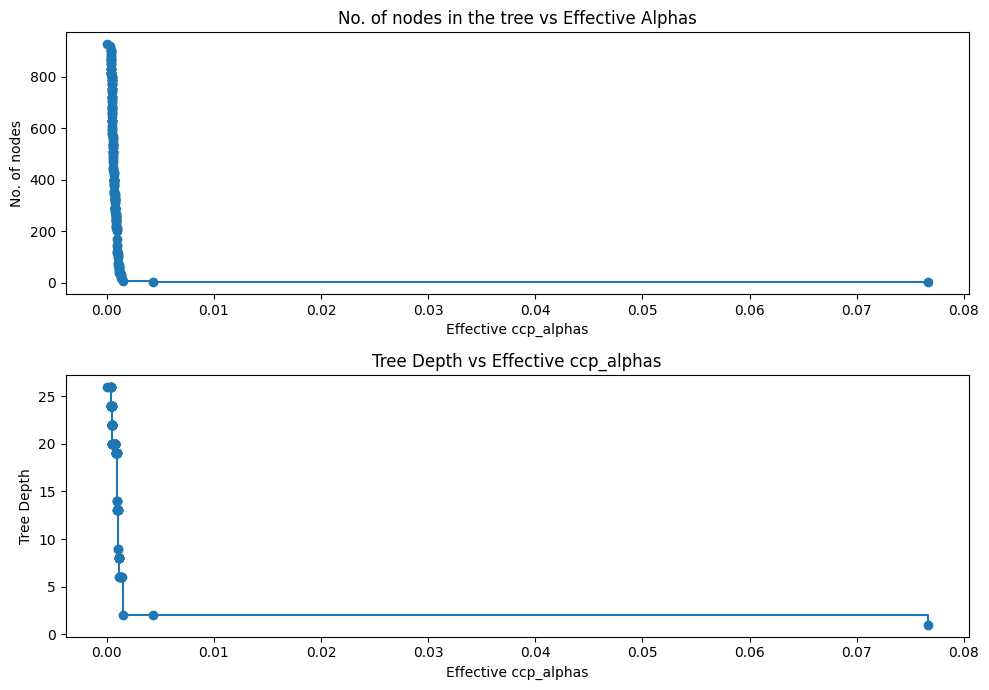

In [51]:
# Draw plots

fig, ax = plt.subplots(2,1,figsize=(10,7))

# Draw a plot between No. of nodes and ccp_alphas
ax[0].plot(ccp_alphas,no_of_nodes,  marker='o', drawstyle='steps-post')
ax[0].set_xlabel("Effective ccp_alphas")
ax[0].set_ylabel("No. of nodes")
ax[0].set_title("No. of nodes in the tree vs Effective Alphas")

# Draw a plot between the depth of the tree vs ccp_alphas
ax[1].plot(ccp_alphas,depth,  marker='o', drawstyle='steps-post')
ax[1].set_ylabel("Tree Depth")
ax[1].set_xlabel("Effective ccp_alphas")
ax[1].set_title("Tree Depth vs Effective ccp_alphas")

fig.tight_layout()
plt.show()


In [52]:
# Lets compare the performance scores between training and test data sets.

train_f1_scores = []
test_f1_scores = []

for clf in clfs:
  train_pred = clf.predict(X_train)
  train_f1_score = f1_score(y_train, train_pred)
  train_f1_scores.append(train_f1_score)

  test_pred = clf.predict(X_test)
  test_f1_score = f1_score(y_test, test_pred)
  test_f1_scores.append(test_f1_score)



/tmp/ipython-input-1176391530.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


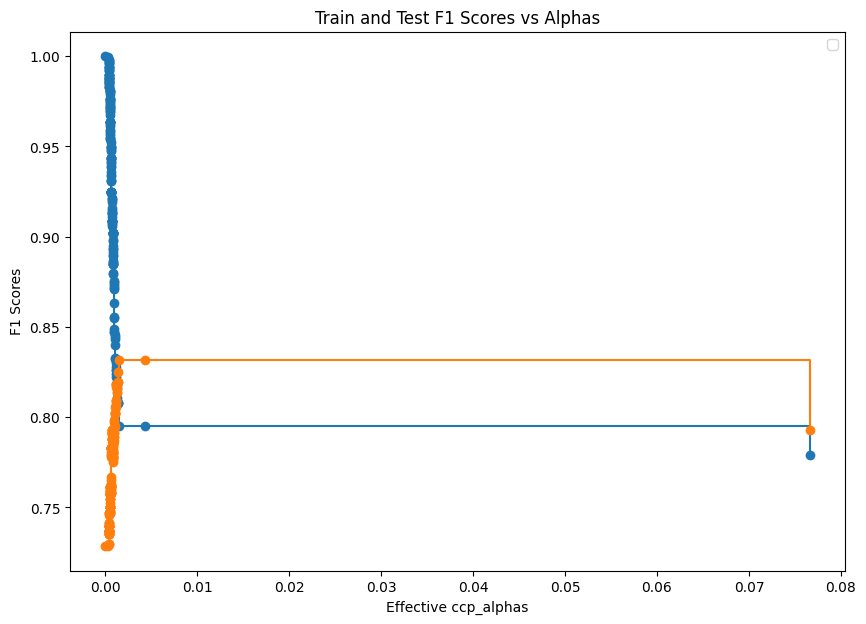

In [53]:
# Draw a diagram with calcualted f1 scores

fig, ax = plt.subplots(figsize=(10,7))

ax.plot(ccp_alphas, train_f1_scores, marker='o', drawstyle='steps-post')
ax.set_xlabel("Effective ccp_alphas")
ax.set_ylabel("F1 Scores")
ax.set_title("Train and Test F1 Scores vs Alphas")

ax.plot(ccp_alphas, test_f1_scores, marker='o', drawstyle='steps-post')

# Add a legend
ax.legend()



In [54]:
# Create a model that has best f1 score.. here we are taking it from test f1 scores.

index_best_model = np.argmax(test_f1_scores)

# Get the best f1 score model
dtree3 = clfs[index_best_model]

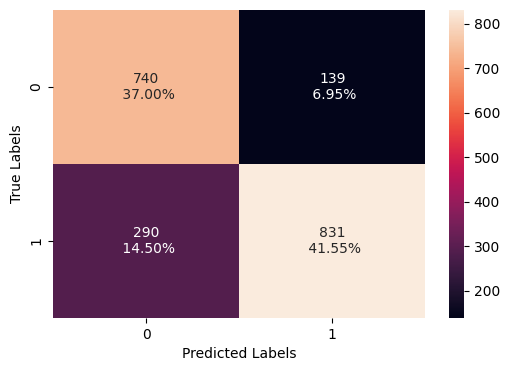

In [55]:
# draw the confusion matrix for training data for best classifier model.
plot_confusion_matrix(dtree3, X_train, y_train)


In [56]:
# print the performance matrix of the model on training data.
dtree3_train_perf =  model_performance_classification(dtree3, X_train, y_train)

dtree3_train_perf

,Accuracy,Recall,Precision,F1 Score
0,0.7855,0.741302,0.856701,0.794835


* 78% accuracy on training data

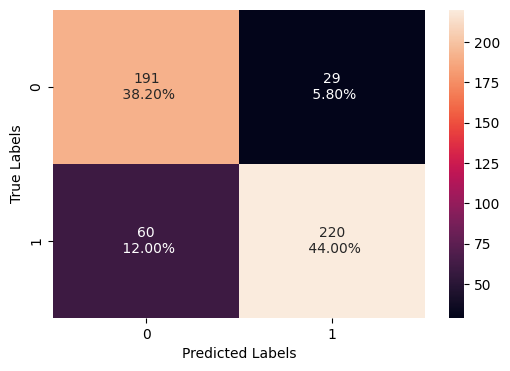

In [57]:
# Confusion matrix for test data
plot_confusion_matrix(dtree3, X_test, y_test)

In [58]:
# performance metrics for test data
dtree3_test_perf = model_performance_classification(dtree3, X_test, y_test)
dtree3_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.822,0.785714,0.883534,0.831758


* 82% accuracy, indicates model is able to generalize the data better.

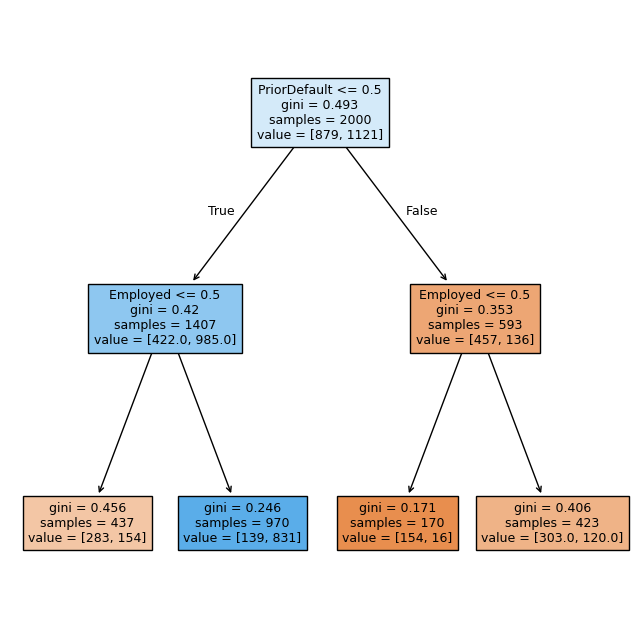

In [59]:
# Visualize the tree.
feature_names = X_train.columns.tolist()

plt.figure(figsize=(8,8))

out = tree.plot_tree(dtree3, feature_names=feature_names, filled=True, class_names=None, fontsize=9, node_ids=False)

for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor('black')
    arrow.set_linewidth(1)

plt.show()


In [60]:
# Generate the text tree
print(tree.export_text(dtree3, feature_names=feature_names, show_weights=True))

|--- PriorDefault <= 0.50
|   |--- Employed <= 0.50
|   |   |--- weights: [283.00, 154.00] class: 0
|   |--- Employed >  0.50
|   |   |--- weights: [139.00, 831.00] class: 1
|--- PriorDefault >  0.50
|   |--- Employed <= 0.50
|   |   |--- weights: [154.00, 16.00] class: 0
|   |--- Employed >  0.50
|   |   |--- weights: [303.00, 120.00] class: 0



In [69]:
models_train_comp_df = pd.concat(
    [
        dtree1_train_perf,
        dtree2_train_perf,
        dtree3_train_perf
    ],axis=0
)

models_train_comp_df.columns = ["Accuracy", "Recall", "Precision", "F1 Score"]
models_train_comp_df.index = ["Decision Tree - SciKit Default", "Decision Tree - Pre-pruned", "Decision Tree - Post-pruned"]

models_train_comp_df


,Accuracy,Recall,Precision,F1 Score
Decision Tree - SciKit Default,1.0000,1.000000,1.000000,1.000000
Decision Tree - Pre-pruned,0.7985,0.773417,0.853346,0.811418
Decision Tree - Post-pruned,0.7855,0.741302,0.856701,0.794835


In [71]:
# Model performance comparision for test data

models_test_comp_df = pd.concat(
    [
        dtree1_test_perf,
        dtree2_test_perf,
        dtree3_test_perf

    ],axis=0
)

models_test_comp_df.columns = ["Accuracy", "Recall", "Precision", "F1 Score"]
models_test_comp_df.index = ["Decision Tree - SciKit Default", "Decision Tree - Pre-pruned", "Decision Tree - Post-pruned"]

models_test_comp_df

,Accuracy,Recall,Precision,F1 Score
Decision Tree - SciKit Default,0.696,0.728571,0.728571,0.728571
Decision Tree - Pre-pruned,0.800,0.792857,0.840909,0.816176
Decision Tree - Post-pruned,0.822,0.785714,0.883534,0.831758


* The SciKit default classifier model is fitting the training data well, but performed poorly on test data. It indicates overfitting.
* The prepruned model accuracy is consistent between training and test data indicating a better generalization.
* The postpruned model too did well with both training and test data, but it doesn't consider all input features and may perform badly on some scenarios.

**Given the observations and performance metrics, the Decision Tree - Prepruned has the best generlization and recommended model for this problem**

## **Feature Importance**

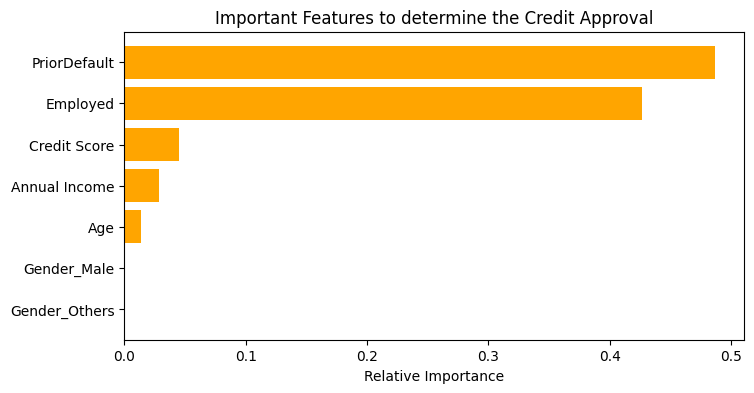

In [78]:
important_features = dtree2.feature_importances_
indicies = np.argsort(important_features)

## Plot a diagram to see the important features and its weigtage.

plt.figure(figsize=(8,4))
plt.title("Important Features to determine the Credit Approval")
plt.barh(range(len(indicies)), important_features[indicies], align="center", color="orange")
plt.yticks(range(len(indicies)), [ feature_names[i] for i in indicies])
plt.xlabel("Relative Importance")
plt.show()


* Current employment status and prior default status are most influential features in determining the credit worthiness
* Credit score and Annual Income are the next best features to consider.

# Predicting on a single data point

In [82]:
%%time
# Predict an applicant's credit worthiness.

applicant_details = X_test.iloc[:1,:]

predict = dtree2.predict(applicant_details)
print(predict)

[1]
CPU times: user 2.35 ms, sys: 950 µs, total: 3.3 ms
Wall time: 3.48 ms


In [84]:
%%time
# Model can also predict the likelyhood of the prediction.

approval_likelihood = dtree2.predict_proba(applicant_details)

print(approval_likelihood[0,1])

0.9104477611940298
CPU times: user 3.64 ms, sys: 0 ns, total: 3.64 ms
Wall time: 5.2 ms
